## 00. PyTorch Fundamentals

This is also a notebook covering the fundamentals of PyTorch. I learned all this from Daniel Bourke's Learn PyTorch in a day (literally) video on youtube.
This is chapter 00 from the tutorial.

In [1]:
!nvidia-smi # Tells us what GPU our machine is using ^_^ 🫡.

Wed Mar  6 10:13:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(torch.__version__)

2.1.0+cu121


In [3]:
print('Hello! I\'m excited to learn PyTorch')

Hello! I'm excited to learn PyTorch


## Introduction to Tensors

A tensor, according to PyTorch is a n-dimensioned matrix that contains data of similar datatype.

### Creating Tensors

PyTorch tensors are created using torch.tensor()

Assignment: Read through [torch.Tensor](https://pytorch.org/docs/stable/tensors.html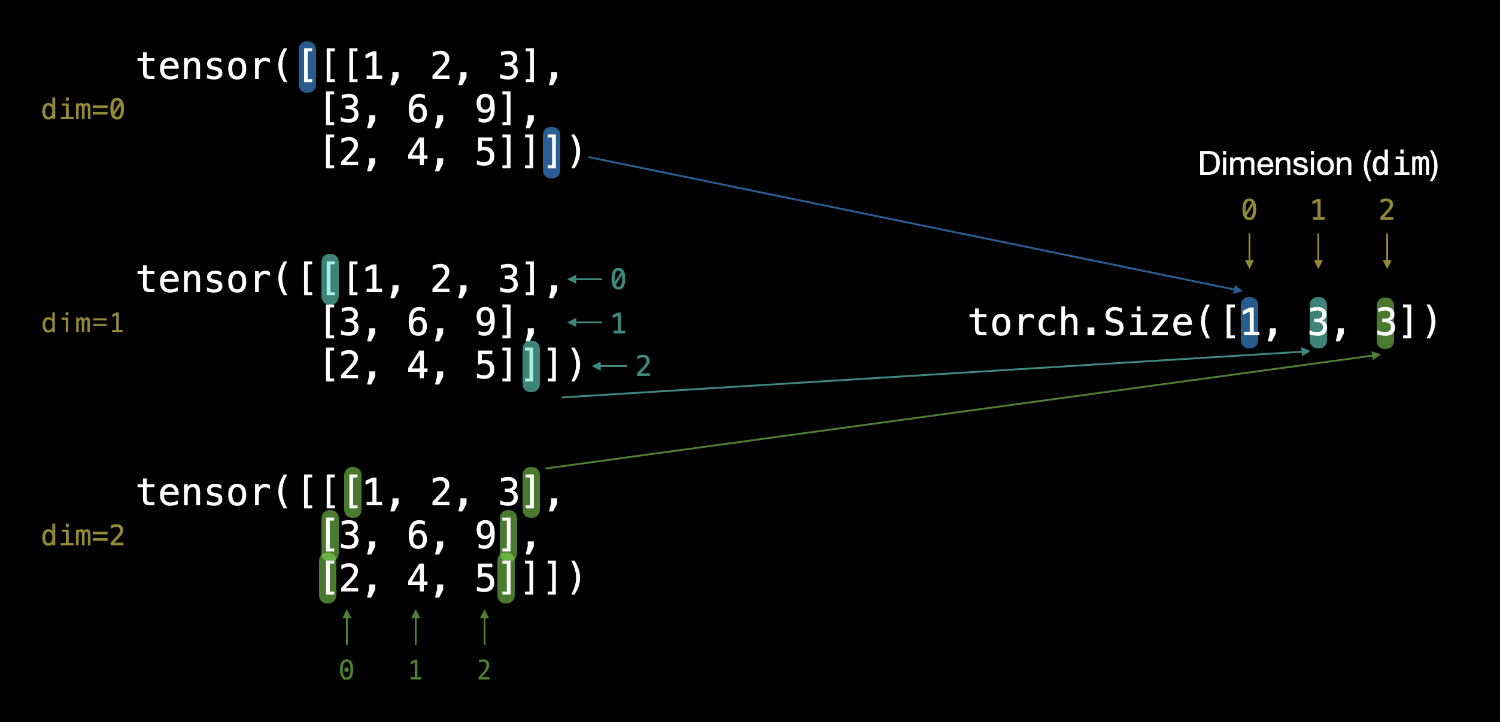) documentation for 10 mins atleast.


In [4]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [5]:
scalar.ndim # Gives us the number of dimensions in our tensor.
# A scalar has 0 dimensions.

0

In [6]:
# Get scalar back as a python int.
scalar.item()

7

In [7]:
# vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [8]:
vector.ndim # You can assume that the dimension is the number of indices required to reference value in the tensor.

1

You can also remember the dimension by the number of square brackets.

In [9]:
vector.shape

torch.Size([2])

In [10]:
# MATRIX
MATRIX = torch.tensor([[7, 8],
                       [9, 10]])

MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [11]:
MATRIX.ndim

2

In [12]:
MATRIX[0] # Gives us the tensor at 1st dimension.

tensor([7, 8])

In [13]:
MATRIX[1] # Gives us the tensor at 2nd dimension.

tensor([ 9, 10])

In [14]:
MATRIX.shape  # MATRIX has 2 rows and 2 columns.

torch.Size([2, 2])

In [15]:
# TENSOR
TENSOR = torch.tensor([[[1,2,3],
                        [3,7,8],
                        [2,7,9]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 7, 8],
         [2, 7, 9]]])

In [16]:
TENSOR.ndim

3

In [17]:
TENSOR.shape  # Gives us number of elements in each dimension.

torch.Size([1, 3, 3])

We have 3 elements in the innermost square brackets, 3 lists in the 2nd square brackets and finally, 1 2D Matrix in the last square brackets. So, the output is 1, 3, 3.

We can understand better by looking at this image -

![Picture](https://raw.githubusercontent.com/suryansh-sinha/Learning-PyTorch/main/Daniel%20Bourke/images/00_PyTorch_Fundamentals/DimensionsExplained.png)


In [18]:
TENSOR[0]

tensor([[1, 2, 3],
        [3, 7, 8],
        [2, 7, 9]])

In [19]:
TENSOR[0][2][1].item()  # Indexing works how it's supposed to.

7

### Notation:
Matrices and Tensors are written in upper case. X, MATRIX etc.

Scalars and Vectors are written lower case. a, b, names, etc.

Not a compulsion though!

### Random Tensors

Why random tensors?

Random tensors are important because the neural networks start out with a tensor full of random values and then improve those values according to observations and patterns they see. They change those numbers to better represent that data.

In [20]:
# Creating a random tensor of size (3,4) or shape(3,4).
random_tensor = torch.rand(3,4)
# The above line is the same as
# random_tensor = torch.rand(size=(3,4))
random_tensor

tensor([[0.9200, 0.8671, 0.8439, 0.7909],
        [0.4245, 0.4345, 0.9536, 0.4077],
        [0.9011, 0.4610, 0.5737, 0.7488]])

In [21]:
random_tensor.ndim

2

In [22]:
# Creating a random tensor with similar shape to an image tensor.
# Let's suppose, the image is rgb and has resolution 224, 224.
random_image_tensor = torch.rand(size=(224,224,3))  # 224 height, 224 width, 3 channels (R, G, B)

In [23]:
random_image_tensor.ndim

3

In [24]:
random_image_tensor.shape

torch.Size([224, 224, 3])

### Zeros and Ones

In [25]:
# Creating a tensor of all zeros
zeros = torch.zeros(size=(3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [26]:
zeros * random_tensor # This is element wise multiplication, so elements at corresponding positions are multiplied.

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [27]:
# Creating a tensor of all ones
ones = torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [28]:
ones.dtype  # Tells us the default datatype of the object or variable.

torch.float32

In [29]:
random_tensor.dtype

torch.float32

By default, any tensor created by PyTorch will be of the datatype float32 unless specified.

### Creating a range of tensors and tensors-like

In [30]:
# Creating a 1D tensor (vector/array) with a specific number range.
# torch.range(0, 10)  # This function will be deprecated. Instead use torch.arange()
oneToTen = torch.arange(0,10)  # first index included, last index excluded. We can also add a step variable like in python.
oneToTen

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
zeroToHunnid = torch.arange(start=0, end=101, step=10)
zeroToHunnid

tensor([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [32]:
# Creating tensors-like or tensors having same shape as another.
ten_zeros = torch.zeros_like(input=oneToTen)  # This creates a zero tensor with the same shape as input tensor.
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor Datatypes

**Note:-** Tensorflow datatypes are one of the big 3 errors that you'll run into in PyTorch and Deep Learning.
1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device

In [33]:
# Float 32 Tensor
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None,  # Specifies the datatype of the tensor.
                               device=None, # We decide where the tensor is calculated. 'cuda' for gpu. 'cpu' for cpu.
                               requires_grad=False) # Whether or not to track gradients with this tensor's operations.
float_32_tensor.dtype

torch.float32

The above code outputs float32 eventhough we specified dtype as none because, in PyTorch, default datatype for any tensor is float32. We can change that though by explicitly specifying another datatype.

In [34]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float16)

#We could also do -
# float_16_tensor = float_32_tensor.type(torch.float16)

float_16_tensor.dtype

torch.float16

In [35]:
ten = float_16_tensor * float_32_tensor # automatically casts float16 tensor to float32 tensor

In [36]:
ten.dtype

torch.float32

### Getting information from tensors (Tensor Attributes).
1. Tensors not right datatype - to get datatype of tensor, we use `tensor.dtype`
2. Tensors not right shape - to get shape of tensor, we use `tensor.shape`
3. Tensors not on the right device - to get device of tensor, we use `tensor.device`

In [37]:
# Create a random tensor
some_tensor = torch.rand(3, 4)
some_tensor

tensor([[0.6466, 0.8983, 0.5737, 0.9793],
        [0.5008, 0.6433, 0.3780, 0.6894],
        [0.1267, 0.2547, 0.6408, 0.5116]])

In [38]:
some_tensor.dtype # Datatype of tensor

torch.float32

In [39]:
some_tensor.device  # Device of tensor

device(type='cpu')

In [40]:
some_tensor.shape # Shape of tensor

torch.Size([3, 4])

In [41]:
some_tensor.size()  # This is the function that returns the shape too.

torch.Size([3, 4])

### Manipulating Tensors (Tensor Operations)

Tensor operations include -
* Addition
* Subtraction
* Multiplication (Element-Wise)
* Division
* Matrix Multiplication

In [42]:
# Creating a tensor and adding 10 to it.
tensor = torch.tensor([1,2,3])
tensor + 10 # Adds to each element

tensor([11, 12, 13])

In [43]:
# Multiplay tensor by 10
tensor * 10 # Multiplies each element by scalar

tensor([10, 20, 30])

In [44]:
# Try out PyTorch in-built functions.
torch.mul(tensor,10)  # Multiplies each element by scalar

tensor([10, 20, 30])

In [45]:
torch.add(tensor,10)  # Adds scalar to each element of tensor

tensor([11, 12, 13])

### Matrix Multiplication
Two main ways of performing multiplication in Neural Networks and Deep Learning.
1. Element-wise Multiplication
2. Matrix Multiplication (Dot Product)

In [46]:
# Elememt wise multiplication
print(tensor, '*', tensor)
print(f'Equals: {tensor * tensor}')

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [47]:
# Matrix Multiplication (Dot Product)
torch.matmul(tensor, tensor)

tensor(14)

In [48]:
# Why did we get 14 - yaha pe we're multiplying 3x1 with 3x1 which isn't possible.
# This is because, matmul returns dot product if both matrices are 1 dimensional.
# So, it automatically takes transpose of one of the matrices and multiplies that with the other matrix.
# So, solving it by hand,
1*1 + 2*2 + 3*3

14

In [49]:
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 1.97 ms, sys: 0 ns, total: 1.97 ms
Wall time: 3.1 ms


In [50]:
%%time
torch.matmul(tensor,tensor) # Much faster compared to above loop that does the same thing.

CPU times: user 477 µs, sys: 0 ns, total: 477 µs
Wall time: 428 µs


tensor(14)

PyTorch version is faster because they use vectorization in their programming.

### Rules for Matrix Multiplication -
1. The **inner dimensions** must match.
* `(3,2) X (3,2)` won't work
* `(3,2) X (2,3)` will work
* `(2,3) X (3,2)` will work

2. The resulting tensor will have the shape of the outer dimensions.
* `(3,2) X (2,2) = (3,2)`
* `(5,8) X (8,4) = (5,4)`

In [51]:
torch.matmul(torch.rand(3,2), torch.rand(3,2))  # This won't work, inner dimensions don't match

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [52]:
torch.matmul(torch.rand(3,2), torch.rand(2,2)).shape

torch.Size([3, 2])

In [53]:
torch.matmul(torch.rand(5,8), torch.rand(8,4)).shape

torch.Size([5, 4])

### One of the most common errors in deep learning is the shape error.

In [54]:
tensorA = torch.tensor([[1,2],
                       [3,4],
                       [5,6]])

tensorB = torch.tensor([[7 ,8],
                       [9 ,10],
                       [11,12]])

In [55]:
# Now if we try to multiply them, we get an error because inner dimensions don't match.
torch.mm(tensorA, tensorB)  # this is an alias function for torch.matmul(). Basically same function called using another name.

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [56]:
# To fix this shape error, we take the transpose of the 2nd or the 1st matrix.
tensorB_transpose = tensorB.T
tensorB_transpose # Row became column, column became row. ^_^.

tensor([[ 7,  9, 11],
        [ 8, 10, 12]])

In [57]:
torch.matmul(tensorA, tensorB_transpose)  # Shape error fixed!

tensor([[ 23,  29,  35],
        [ 53,  67,  81],
        [ 83, 105, 127]])

Go to https://matrixmultiplication.xyz to visualize matrix multiplication! It's fun to look at the process.

### Finding the min, max, mean, sum etc (Tensor Aggregation)

In [58]:
# Creata a tensor
x = torch.arange(0, 100, 10)
x, x.dtype

(tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]), torch.int64)

In [59]:
# Finding the min
torch.min(x), x.min()

(tensor(0), tensor(0))

In [60]:
# Finding the max
torch.max(x), x.max()

(tensor(90), tensor(90))

In [61]:
# Finding the average
torch.mean(x), x.mean() # ahhahahahhaha tensor not right datatype error.

RuntimeError: mean(): could not infer output dtype. Input dtype must be either a floating point or complex dtype. Got: Long

In [62]:
x.dtype # Our tensor is int64 (Long). But we need float or complex tensor in mean function.

torch.int64

In [63]:
x.type()

'torch.LongTensor'

```tensor_name.type()``` function returns the type of the tensor since the dtype is not specified

```tensor_name.type(dtype)``` returns a new tensor having the contents of the original tensor but with the specified datatype.

In [64]:
# Finding the average (again)
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [65]:
x.dtype

torch.int64

In [66]:
# Finding the sum
torch.sum(x), x.sum()

(tensor(450), tensor(450))

In [67]:
# Position of min, max values in our tensors. Returns the index value.
torch.argmin(x), torch.argmax(x)
# Could also do
x.argmin(), x.argmax()

(tensor(0), tensor(9))

## Tensor Manipulation Part 2
We perform the following manipulations on tensors -
* reshape - changes the shape of the tensor to whatever we provide.
* view - create another tensor with different shape but that tensor shares memory with the original vector. returns a view of the input tensor in a different shape but shares memory with the original tensor
* stack - concatenating tensors along a single dimension. combining multiple tensors on top of each other (vstack) or side by side (hstack).
* squeeze - Removes the dimensions that have only 1 value in it (i.e dimensions of size 1). removes all the '1' dimensions from the tensor.
* unsqueeze - Adds a '1' dimension at specified index in the tensor.
* permute - Rearranges the dimensions of the tensor in specified way. Returns a view of the tensor with dimensions permuted (swapped) in a certain way.

In [68]:
import torch
x = torch.arange(1., 11., 1)
x, x.shape

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), torch.Size([10]))

In [69]:
x_reshaped = x.reshape(1,10)  # We just added an extra '1' dimension
x_reshaped

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])

In [70]:
x_reshaped1 = x.reshape(2,5)
x_reshaped1

tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.]])

In [71]:
x_reshaped2 = x.reshape(5,2)
x_reshaped2

tensor([[ 1.,  2.],
        [ 3.,  4.],
        [ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [72]:
# If the number of elements in the original array does not match the dimensions of new array, we get an error.
x_reshape = x.reshape(3,3)
x_reshape

RuntimeError: shape '[3, 3]' is invalid for input of size 10

In [73]:
# Changing the view.
z = x.view(2,5)
z # This z variable shares memory with our original tensor x. So, changing any value in z will change x also.

tensor([[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.]])

In [74]:
z[1,0] = 69.
z, x
# As you can see, change reflected in x as well.

(tensor([[ 1.,  2.,  3.,  4.,  5.],
         [69.,  7.,  8.,  9., 10.]]),
 tensor([ 1.,  2.,  3.,  4.,  5., 69.,  7.,  8.,  9., 10.]))

In [75]:
# Stacking tensors on top of each other.
x_stacked = torch.stack((x, x, x, x), dim=0)
# dim 0 means that the tensors are added horizontally in the same row one by one. Along the x axis.
x_stacked

tensor([[ 1.,  2.,  3.,  4.,  5., 69.,  7.,  8.,  9., 10.],
        [ 1.,  2.,  3.,  4.,  5., 69.,  7.,  8.,  9., 10.],
        [ 1.,  2.,  3.,  4.,  5., 69.,  7.,  8.,  9., 10.],
        [ 1.,  2.,  3.,  4.,  5., 69.,  7.,  8.,  9., 10.]])

In [76]:
x_stacked2 = torch.stack((x,x,x,x), dim=1)
# dim 1 means stacked along the y axis. Basically same index wale elements are stacked together in a single array.
x_stacked2

tensor([[ 1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.],
        [ 4.,  4.,  4.,  4.],
        [ 5.,  5.,  5.,  5.],
        [69., 69., 69., 69.],
        [ 7.,  7.,  7.,  7.],
        [ 8.,  8.,  8.,  8.],
        [ 9.,  9.,  9.,  9.],
        [10., 10., 10., 10.]])

In [77]:
x_vertical = torch.vstack((x,x,x,x))
x_vertical

tensor([[ 1.,  2.,  3.,  4.,  5., 69.,  7.,  8.,  9., 10.],
        [ 1.,  2.,  3.,  4.,  5., 69.,  7.,  8.,  9., 10.],
        [ 1.,  2.,  3.,  4.,  5., 69.,  7.,  8.,  9., 10.],
        [ 1.,  2.,  3.,  4.,  5., 69.,  7.,  8.,  9., 10.]])

In [78]:
x_horizontal = torch.hstack((x,x,x,x))  # hstack is comparatively different to stack with dim=0.
# It keeps all elements in a single list instead of keeping separate lists (basically it doesnt add any dimension.)
x_horizontal

tensor([ 1.,  2.,  3.,  4.,  5., 69.,  7.,  8.,  9., 10.,  1.,  2.,  3.,  4.,
         5., 69.,  7.,  8.,  9., 10.,  1.,  2.,  3.,  4.,  5., 69.,  7.,  8.,
         9., 10.,  1.,  2.,  3.,  4.,  5., 69.,  7.,  8.,  9., 10.])

In [79]:
# Trying to use torch.squeeze(input, dim=None) --> removes single dimensions from a tensor
zeroTensor = torch.zeros(2,1,2,1,2)
zeroTensor

tensor([[[[[0., 0.]],

          [[0., 0.]]]],



        [[[[0., 0.]],

          [[0., 0.]]]]])

In [80]:
# torch.squeeze(input, dim=None). dim can be an int or a tuple of ints containing all the indices where you want to remove the '1' dimension.
# returns a tensor with all specified dimensions of input of size 1 removed.
torch.squeeze(zeroTensor), torch.squeeze(zeroTensor).shape # Basically the same as above but removed the dimensions where only 1 value was present.

(tensor([[[0., 0.],
          [0., 0.]],
 
         [[0., 0.],
          [0., 0.]]]),
 torch.Size([2, 2, 2]))

In [81]:
torch.squeeze(zeroTensor, 0), torch.squeeze(zeroTensor, 0).size() # Since there is no '1' dimension at index 0, we made no changes to the tensor.

(tensor([[[[[0., 0.]],
 
           [[0., 0.]]]],
 
 
 
         [[[[0., 0.]],
 
           [[0., 0.]]]]]),
 torch.Size([2, 1, 2, 1, 2]))

In [82]:
torch.squeeze(zeroTensor, 1), torch.squeeze(zeroTensor, 1).shape  # Removes the '1' dimension available at index 1. So, change made in zeroTensor.

(tensor([[[[0., 0.]],
 
          [[0., 0.]]],
 
 
         [[[0., 0.]],
 
          [[0., 0.]]]]),
 torch.Size([2, 2, 1, 2]))

In [83]:
squeezedAlongDim = torch.squeeze(zeroTensor, dim=1)  # Squeezes the tensor only along the dimension at index 1 in shape tuple of the tensor.
squeezedAlongDim, squeezedAlongDim.shape

(tensor([[[[0., 0.]],
 
          [[0., 0.]]],
 
 
         [[[0., 0.]],
 
          [[0., 0.]]]]),
 torch.Size([2, 2, 1, 2]))

In [84]:
zeroTensor.shape

torch.Size([2, 1, 2, 1, 2])

In [85]:
torch.squeeze(zeroTensor, (1, 2, 3))  # Since there is '1' dimension available only at indices 1, 3. It changes those and the index 2 remains unchanged.

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])

In [86]:
# Trying to use torch.unsqueeze(input_tensor, dim_index)
# Returns a new tensor with a dimension of size one inserted at the specified position. Basically the opposite of what squeeze does.

squeezeCheck = torch.tensor([1, 2, 3, 4])

print(f'Normal Tensor: \n{squeezeCheck}')
print(f'Normal Tensor\'s Shape: {squeezeCheck.shape}')

unsqueezed = torch.unsqueeze(squeezeCheck, dim=0)

print()
print(f'Unsqueezed Tensor, \'1\' dimension inserted at index 0: \n{unsqueezed}')
print(f'Unsqueezed Tensor\'s Shape: {unsqueezed.shape}')

print()

unsqueezed = torch.unsqueeze(squeezeCheck, dim=1)
print(f'Unsqueezed Tensor, \'1\' dimension inserted at index 1: \n{unsqueezed}')
print(f'Unsqueezed Tensor\'s Shape: {unsqueezed.shape}')


Normal Tensor: 
tensor([1, 2, 3, 4])
Normal Tensor's Shape: torch.Size([4])

Unsqueezed Tensor, '1' dimension inserted at index 0: 
tensor([[1, 2, 3, 4]])
Unsqueezed Tensor's Shape: torch.Size([1, 4])

Unsqueezed Tensor, '1' dimension inserted at index 1: 
tensor([[1],
        [2],
        [3],
        [4]])
Unsqueezed Tensor's Shape: torch.Size([4, 1])


You can see, single dimension added at index 1 (because dim=1)

### Permutation -

It retuns a view of the original tensor with rearranged dimensions. It shares the memory with the original tensor so any changes to either of the tensors will change the other one too!

In [87]:
pTest = torch.randn(2, 3, 5)  # This has shape as (2, 3, 5)
permuted_pTest = torch.permute(pTest, (2, 0, 1))
# What we're doing is arranging dimensions such that dimension at index 2 in pTest ka shape tuple gets placed at index 0 in the new shape tuple.
# Similarly, our 2nd dimension becomes index 0 of shape tuple of original tensor and, 3rd dimension becomes index 1 of shape tuple of original tensor.
print(f'Original shape: {pTest.shape}')
print(f'Permuted shape: {permuted_pTest.shape}')

Original shape: torch.Size([2, 3, 5])
Permuted shape: torch.Size([5, 2, 3])


### A better example would be rearranging image data

In [88]:
img_data = torch.rand(28,28,3)  # [height, width, color]

# Permute(rearrange) the original dimensions.
# We want to rearrange such that color becomes 1st dimension, then height and then width.
img_data_permuted = img_data.permute(2,0,1)  # Shifts dimension 2->0, 0->1, 1->2.

print(f'Original shape: {img_data.shape}')
print(f'Permuted shape: {img_data_permuted.shape}')

Original shape: torch.Size([28, 28, 3])
Permuted shape: torch.Size([3, 28, 28])


In [89]:
img_data[0, 0, 0] = 420 # Permutation is just a view of the tensor. So changing original tensor changes permutation too.
print(img_data_permuted[0, 0, 0])

tensor(420.)


## Indexing
### Indexing with PyTorch is the similar to indexing with NumPy

In [90]:
# Create a tensor
x = torch.arange(1, 10).reshape(1,3,3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [91]:
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [92]:
# Let's index the middle bracket containing 4,5,6
x[0,1]

tensor([4, 5, 6])

In [93]:
# Can also use other notation.
x[0][1]

tensor([4, 5, 6])

In [94]:
x[:, 2]

tensor([[7, 8, 9]])

In [95]:
# Get all values of 0th and 1st dimensions but only index 1 of 2nd dimension
x[:, :, 1]

tensor([[2, 5, 8]])

In [96]:
# Get all values of the 0th dimension but only the 1 index value of 1st and 2nd dimension
x[:,1,1]

tensor([5])

In [97]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0,0,:]

tensor([1, 2, 3])

In [98]:
# To get output 9
x[0,2,2]

tensor(9)

In [99]:
# To get output 3, 6, 9
x[:,:,2]

tensor([[3, 6, 9]])

## PyTorch Tensors and Numpy

PyTorch has the ability to interact with NumPy arrays.

* Data in Numpy  -> Want in tensor --> `torch.from_numpy(ndarray)`
* Data in tensor -> Want in Numpy  --> `torch.Tensor.numpy()`

In [100]:
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [101]:
# Default datatype in pytorch is float32, whereas it's float64 in numpy.
# When converting from numpy array to pytorch tensor, numpy's default datatype -> float64 is used unless specified
array.dtype, tensor.dtype

(dtype('float64'), torch.float64)

In [102]:
# Change the value of array, what will that do to tensor ?
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

Changing the values in the numpy array won't affect the values in the created tensor. No memory is shared between the two.

In [103]:
# Tensor to Numpy Array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [104]:
# Change the tensor, what happens to numpy_tensor ?
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

Changing the values in the tensor won't affect the values in the created numpy array. No memory is shared between the two.

## Reproducability (trying to take random out of the random)

In short, how neural network learns:

`start with random numbers -> tensor operations -> update random numbers to try to make them better representations of data -> repeat this...`

To reduce the randomness in neural networks and PyTorch, we use the concept of **random seed**. Basically, if we use the same random seed, we can recreate the same random numbers again. To know what random seed is, watch the khan academy video on Cryptography.

In [105]:
import torch

tensorA = torch.rand(3, 4)
tensorB = torch.rand(3, 4)

print(tensorA)
print(tensorB)
print(tensorA == tensorB) # Prints the condition for each element of the tensor(WOW!)

tensor([[0.9656, 0.2705, 0.4195, 0.7334],
        [0.8067, 0.2730, 0.8680, 0.7536],
        [0.3646, 0.2135, 0.6390, 0.3226]])
tensor([[0.7658, 0.1505, 0.5839, 0.4742],
        [0.8091, 0.4576, 0.2651, 0.8746],
        [0.5529, 0.0013, 0.3882, 0.5649]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [106]:
# Let's make a random number pattern but make it reproducible.
import torch

# Set the random seed.
RANDOM_SEED = 295 # RIP

torch.manual_seed(RANDOM_SEED)
tensorC = torch.rand(3,4)

# Need to set the random seed again in order to create the same numbers otherwise, it's gonna create random numbers further down the sequence.
torch.manual_seed(RANDOM_SEED)
tensorD = torch.rand(3,4)

print(tensorC)
print(tensorD)
print(tensorC == tensorD) # Prints the condition for each element of the tensor(WOW!)

tensor([[0.2713, 0.8702, 0.8820, 0.9400],
        [0.2000, 0.4267, 0.3424, 0.8355],
        [0.2013, 0.0134, 0.9623, 0.5154]])
tensor([[0.2713, 0.8702, 0.8820, 0.9400],
        [0.2000, 0.4267, 0.3424, 0.8355],
        [0.2013, 0.0134, 0.9623, 0.5154]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


Once you set the seed it starts generating random numbers and it goes on to reproduce random numbers in the same pattern. So, when you set the seed again, it generates the same numbers again. We can hence see that tensorC and tensorD have the same values.

Read more about [PyTorch Reproducibility.](https://pytorch.org/docs/stable/notes/randomness.html)

## Running tensors and PyTorch objects on GPUs (and making faster computations)

### 1. Getting a GPU.
Easiest way to do that is using colab. You can also access your nvidia gpu if you have one. I have a mac m1 so smh.

In [107]:
!nvidia-smi

Wed Mar  6 10:16:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Running Torch tensors on GPU.


In [108]:
import torch
torch.cuda.is_available() # Returns if GPU is available to work on.
# torch.backends.mps.is_available() if you're on a M-series macbook to use Apple's GPU.

True

In [109]:
# We create a device variable to store what kind of device we're working on
device = 'cuda' if torch.cuda.is_available() else 'cpu' # This is good practice to write 'device agnostic code'.
# device = 'mps' if torch.backends.mps.is_available() else 'cpu'
# torch.set_default_device(device)
device

'cuda'

In [110]:
# Counting the number of GPUs available for us.
torch.cuda.device_count()

1

## Putting tensors (and models) on GPU.

To change the default device, PyTorch 2.0 onwards, we have the `torch.set_default_device(device_name)` function that sets the default device.

To change the device of the tensor you're working with, you can call the `to(device)` function.

Putting a tensor on GPU using `to(device)` (e.g. `some_tensor.to(device)`) returns a copy of that tensor, e.g. the same tensor will be on CPU and GPU. To overwrite tensors, reassign them:
some_tensor = some_tensor.to(device)

In [115]:
# Creating a Tensor on CPU.
tensor = torch.tensor([1,2,3])
tensor, tensor.device

(tensor([1, 2, 3]), device(type='cpu'))

In [116]:
# tensorGPU = torch.tensor([1,2,3], device='cuda')
tensorGPU = tensor.to(device) # Creates a copy of our tensor in upper code block and puts it on the gpu.
tensor, tensorGPU.device

(tensor([1, 2, 3]), device(type='cuda', index=0))

## Moving tensors back to CPU.

You would do this if you want to interact with numpy arrays because numpy does not utilize GPUs.
So, let's try using the `torch.Tensor.numpy()` method on our tensor.

In [113]:
torch.Tensor.numpy(tensorGPU) # This throws an error saying that we can't convert a GPU tensor to numpy array.
# We could also call tensorGPU.numpy() and it would be the same as the above line of code.

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [117]:
# To fix this issue, we use torch.Tensor.cpu()
# This copies the Tensor to CPU memory so we can change it to arrays and shit.
tensorCPU = torch.Tensor.cpu(tensorGPU)
tensorCPU = tensorCPU.numpy()
tensorCPU

array([1, 2, 3])

## END OF THE FIRST UNIT. NOW WE MOVE ON TO CREATE A MODEL! EXCITING STUFF.

## Exercise

1. Documentation reading - A big part of deep learning (and learning to code in general) is getting familiar with the documentation of a certain framework you're using. We'll be using the PyTorch documentation a lot throughout the rest of this course. So I'd recommend spending 10-minutes reading the following (it's okay if you don't get some things for now, the focus is not yet full understanding, it's awareness). See the documentation on torch.Tensor and for torch.cuda.
2. Create a random tensor with shape (7, 7).
3. Perform a matrix multiplication on the tensor from 2 with another random tensor with shape (1, 7) (hint: you may have to transpose the second tensor).
4. Set the random seed to 0 and do exercises 2 & 3 over again.
5. Speaking of random seeds, we saw how to set it with torch.manual_seed() but is there a GPU equivalent? (hint: you'll need to look into the documentation for torch.cuda for this one). If there is, set the GPU random seed to 1234.
6. Create two random tensors of shape (2, 3) and send them both to the GPU (you'll need access to a GPU for this). Set torch.manual_seed(1234) when creating the tensors (this doesn't have to be the GPU random seed).
7. Perform a matrix multiplication on the tensors you created in 6 (again, you may have to adjust the shapes of one of the tensors).
8. Find the maximum and minimum values of the output of 7.
9. Find the maximum and minimum index values of the output of 7.
10. Make a random tensor with shape (1, 1, 1, 10) and then create a new tensor with all the 1 dimensions removed to be left with a tensor of shape (10). Set the seed to 7 when you create it and print out the first tensor and it's shape as well as the second tensor and it's shape.

## Exercise Solutions

In [118]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tensor = torch.rand((7,7))
tensor

tensor([[0.4044, 0.9615, 0.2088, 0.5730, 0.7470, 0.7694, 0.7287],
        [0.3073, 0.1577, 0.4780, 0.9440, 0.6070, 0.4859, 0.3302],
        [0.3119, 0.0943, 0.6769, 0.2081, 0.9878, 0.7300, 0.6370],
        [0.9109, 0.2260, 0.2113, 0.0396, 0.4422, 0.3240, 0.2898],
        [0.7094, 0.8410, 0.8604, 0.0363, 0.6487, 0.1295, 0.8803],
        [0.2609, 0.6288, 0.3626, 0.4674, 0.8558, 0.5846, 0.0383],
        [0.0263, 0.3287, 0.4921, 0.5110, 0.6804, 0.1035, 0.0851]])

In [119]:
tensor2 = torch.rand(1,7)
multiplied = torch.matmul(tensor, tensor2.T)
multiplied, multiplied.shape

(tensor([[1.6985],
         [1.2252],
         [1.5197],
         [1.1292],
         [1.5496],
         [1.3523],
         [0.7235]]),
 torch.Size([7, 1]))

In [120]:
RANDOM_SEED = 0
torch.manual_seed(RANDOM_SEED)
A = torch.rand((7,7))
torch.manual_seed(RANDOM_SEED)
B = torch.rand((1,7))
C = torch.mm(A, B.T)
C

tensor([[1.5985],
        [1.1173],
        [1.2741],
        [1.6838],
        [0.8279],
        [1.0347],
        [1.2498]])

In [121]:
torch.cuda.manual_seed(1234)
t1 = torch.rand((2, 3)).to(device)
t2 = torch.rand((2, 3)).to(device)
t1, t2

(tensor([[0.8964, 0.4556, 0.6323],
         [0.3489, 0.4017, 0.0223]], device='cuda:0'),
 tensor([[0.1689, 0.2939, 0.5185],
         [0.6977, 0.8000, 0.1610]], device='cuda:0'))

In [122]:
mul = torch.matmul(t1, t2.T)
mul

tensor([[0.6131, 1.0917],
        [0.1886, 0.5684]], device='cuda:0')

In [123]:
maxval = mul.max()
minval = mul.min()

maxval, minval

(tensor(1.0917, device='cuda:0'), tensor(0.1886, device='cuda:0'))

In [124]:
maxIndex = mul.argmax()
minIndex = mul.argmin()

maxIndex, minIndex

(tensor(1, device='cuda:0'), tensor(2, device='cuda:0'))

In [127]:
torch.cuda.manual_seed(7)
TENSOR = torch.rand((1,1,1,10)).to(device)
changedTensor = TENSOR.squeeze()
print(f'First Tensor: {TENSOR}, \nShape of First Tensor: {TENSOR.shape}')
print(f'\n\nChanged Tensor: {changedTensor}, \nShape of Changed Tensor: {changedTensor.shape}')

First Tensor: tensor([[[[0.7423, 0.5263, 0.2437, 0.5846, 0.0332, 0.1387, 0.2422, 0.8155,
           0.7932, 0.2783]]]], device='cuda:0'), 
Shape of First Tensor: torch.Size([1, 1, 1, 10])


Changed Tensor: tensor([0.7423, 0.5263, 0.2437, 0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932,
        0.2783], device='cuda:0'), 
Shape of Changed Tensor: torch.Size([10])
